# OMAR YOUSIF Abdelhamied et GOULAM Jaheer alee

# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h) 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("data-20241007/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

    Longitude   Latitude
2   66.004734  33.835231
18  20.049834  41.142450
34   2.617323  28.158938
50  17.537368 -12.293361
82 -65.179807 -35.381349


/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/2077099770.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

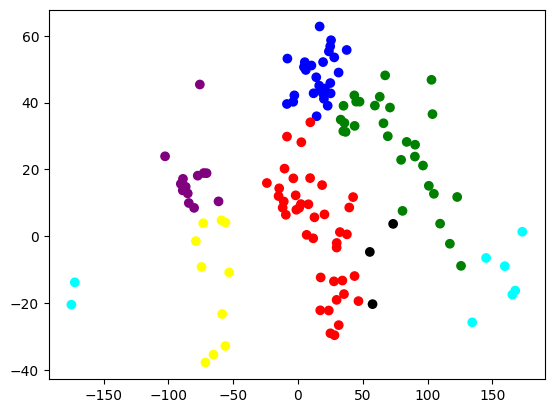

In [18]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

print(df_X.head())


np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
plt

**QUESTION 1**

Identify each class with the plot colors

    rouge : Afrique
    
    vert : Asie
    
    bleu : Europe
    
    violet : Amérique du Nord
    
    jaune : Amérique du Sud
    
    noir : Sept mers
    
    cyan : Océanie


What do the coordinates correspond to?

    Les coordonnées dans le graphique correspondent aux longitudes et latitudes des différents pays présents dans les données.

**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

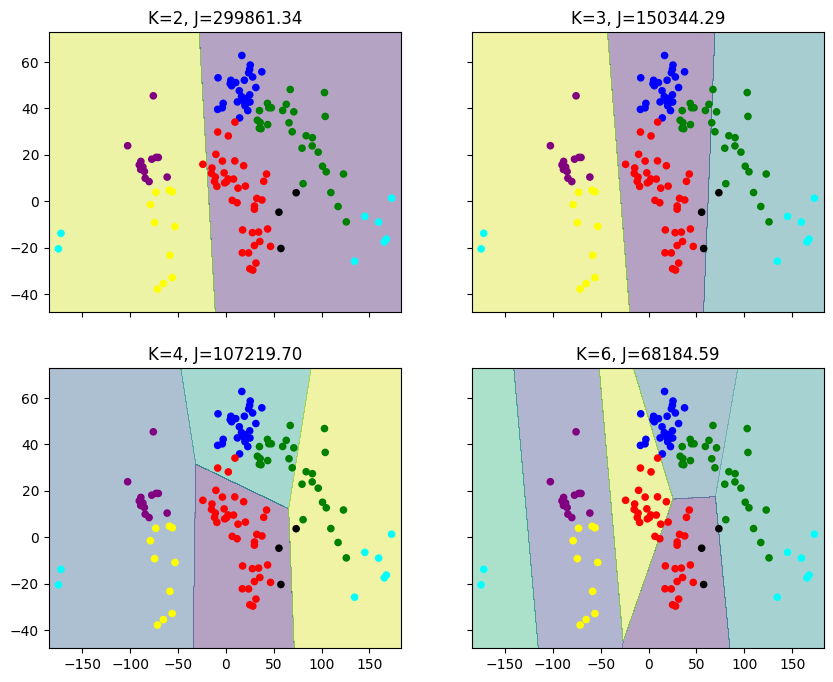

In [19]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

L'inertie mesure la qualité des clusters en calculant la somme des distances au carré entre les points de données et le centroïde de leur cluster attribué.utiliser uniquement l'inertie pour comparer les clusters peut être trompeur, car elle tend à diminuer lorsque le nombre de clusters augmente, même si la qualité des clusters diminue.

Silhouette Index : Il combine la compacité et la séparation en mesurant à quel point un point est similaire à son propre cluster par rapport aux autres clusters

Which is the main problem with the mercator representation for continent detection?


## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

    Longitude   Latitude
2   36.004734  33.835231
18  -9.950166  41.142450
34 -27.382677  28.158938
50 -12.462632 -12.293361
82 -95.179807 -35.381349


/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/784344742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'] -30
/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/784344742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x +360 if x < -180 else x)
/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/784344742.py:8: FutureWarning: Downcasting behavior in `replace` is depre

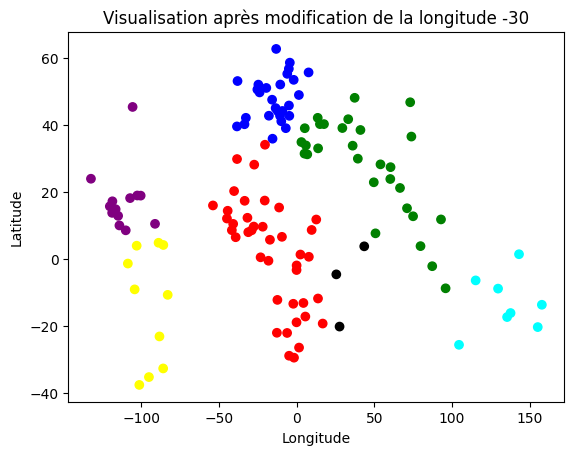

In [20]:
df_X = df1[['Longitude', 'Latitude']]
df_X['Longitude'] = df_X['Longitude'] -30
df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x +360 if x < -180 else x)

print(df_X.head())

df_Status = df1[['Continent']]
df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy().reshape((df_Y.shape[0],))

np1 = df_X.to_numpy()

plt.scatter(np1[:, 0], np1[:, 1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualisation après modification de la longitude -30')
plt.show()


**QUESTION 3**

What are the advantages of this normalization?
En décalant les longitudes, on ajuste la carte pour regrouper la région d'Océanie qui a été séparer dans le projection de Mercator

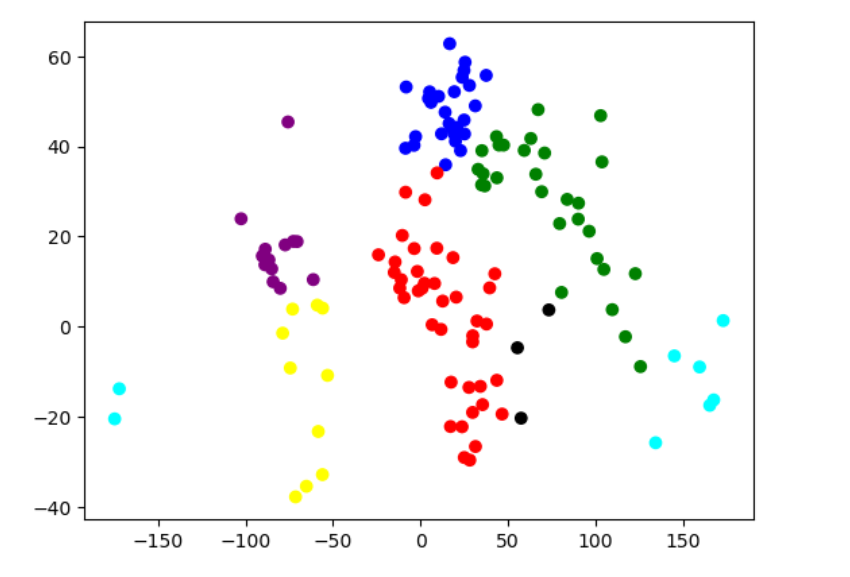

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

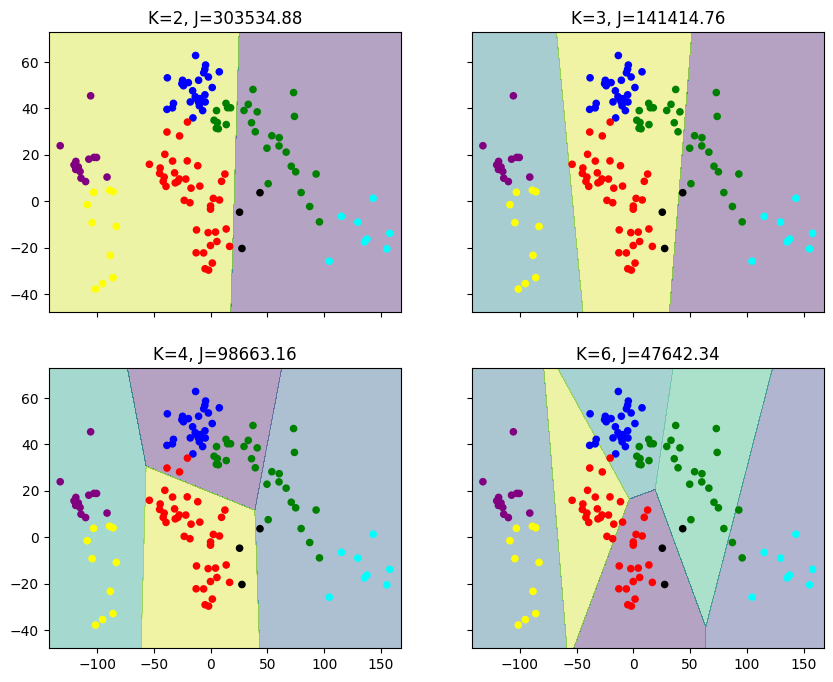

In [21]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

<module 'matplotlib.pyplot' from '/Users/jaheergoulam/PycharmProjects/TP_Machine_Learning/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

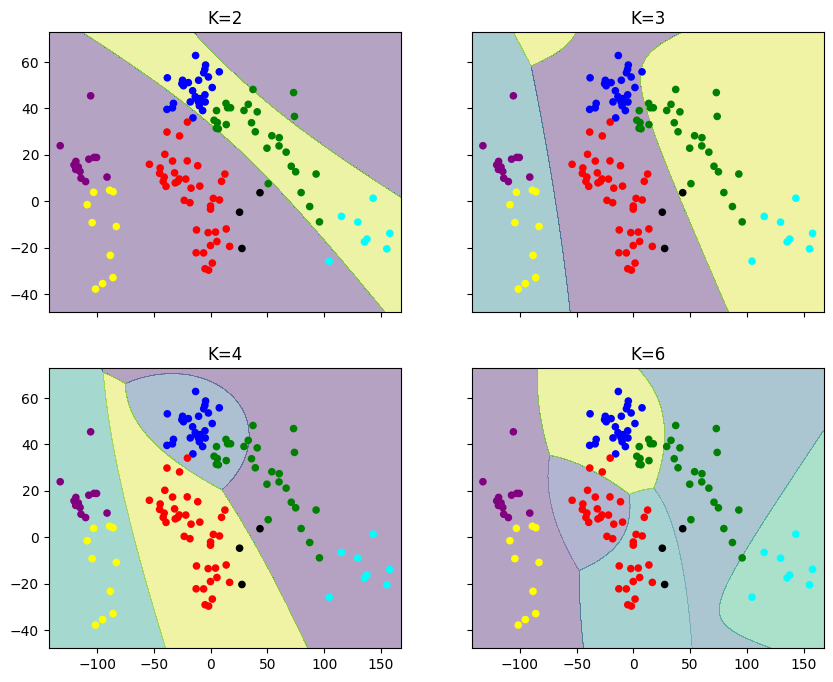

In [22]:
from sklearn.mixture import GaussianMixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gmm2 = GaussianMixture(n_components=2).fit(np1)
gmm3 = GaussianMixture(n_components=3).fit(np1)
gmm4 = GaussianMixture(n_components=4).fit(np1)
gmm6 = GaussianMixture(n_components=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [gmm2, gmm3, gmm4, gmm6],
                        ["K=2",
                         "K=3", 
                         "K=4", 
                         "K=6"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     


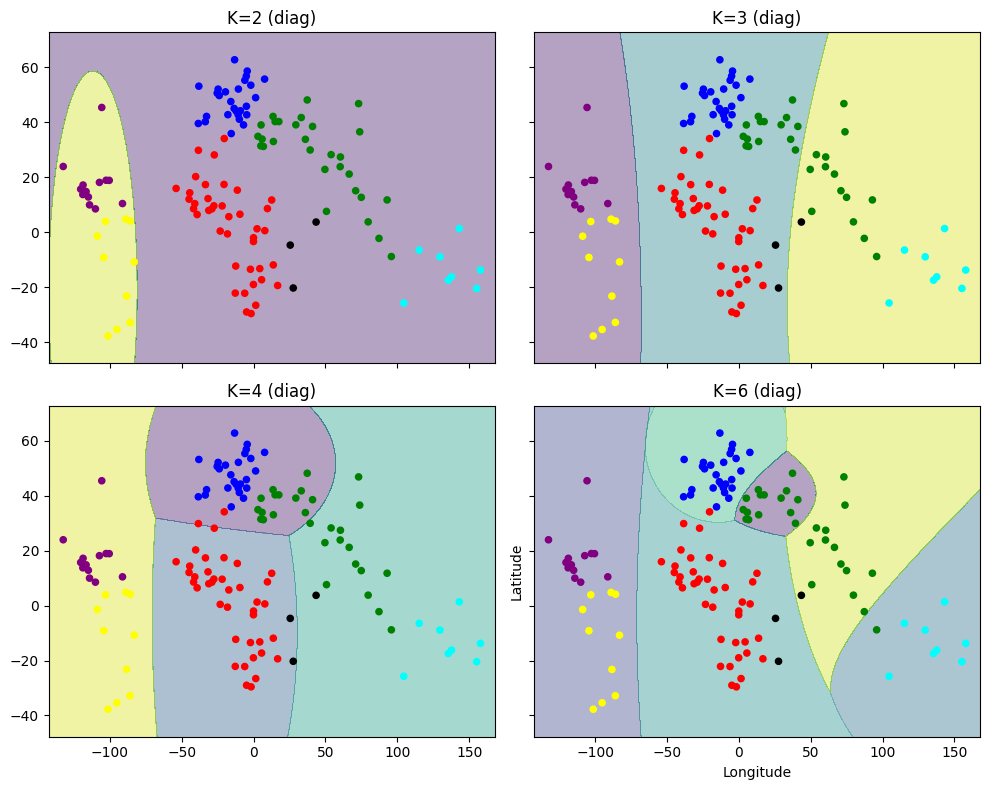

In [23]:
# GMM avec matrice de covariance diagonale
gmm2 = GaussianMixture(n_components=2, covariance_type='diag').fit(np1)
gmm3 = GaussianMixture(n_components=3, covariance_type='diag').fit(np1)
gmm4 = GaussianMixture(n_components=4, covariance_type='diag').fit(np1)
gmm6 = GaussianMixture(n_components=6, covariance_type='diag').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [gmm2, gmm3, gmm4, gmm6],
                        ["K=2 (diag)",
                         "K=3 (diag)", 
                         "K=4 (diag)", 
                         "K=6 (diag)"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                   s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

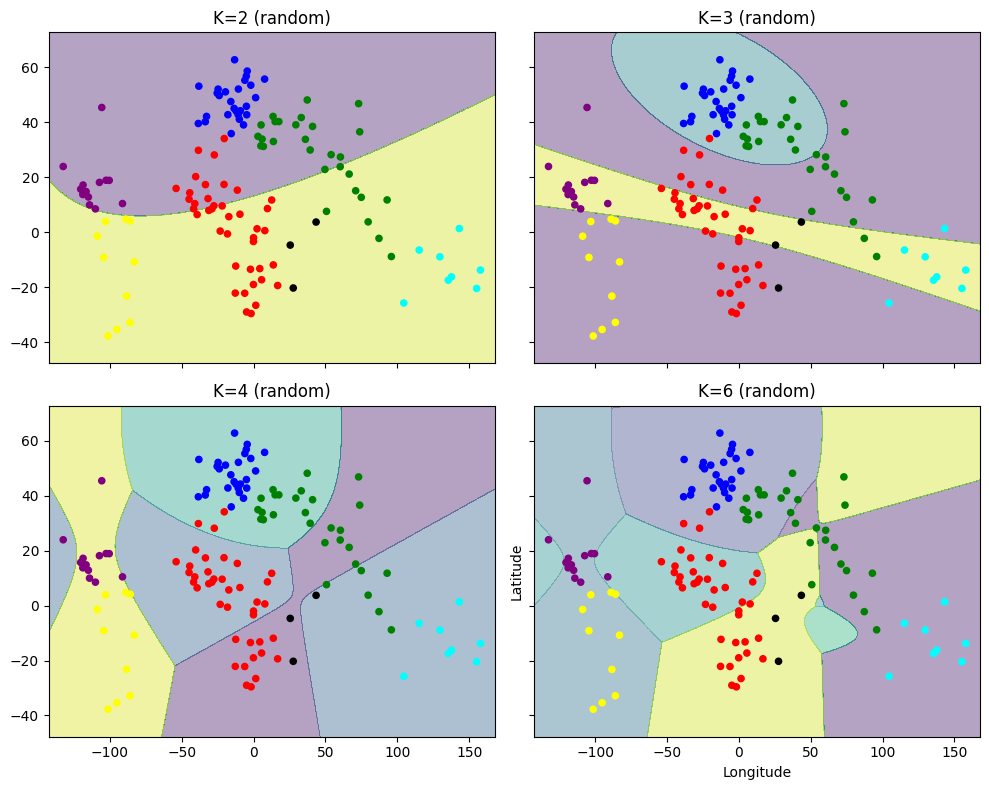

Probabilities for each cluster: [[9.98464890e-01 2.87733811e-08 2.81569810e-24 1.53508125e-03]]


In [24]:
# Définir les bornes pour le contour
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# GMM avec initialisation aléatoire
gmm2 = GaussianMixture(n_components=2, init_params='random').fit(np1)
gmm3 = GaussianMixture(n_components=3, init_params='random').fit(np1)
gmm4 = GaussianMixture(n_components=4, init_params='random').fit(np1)
gmm6 = GaussianMixture(n_components=6, init_params='random').fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gmm, tt in zip(product([0, 1], [0, 1]),
                        [gmm2, gmm3, gmm4, gmm6],
                        ["K=2 (random)",
                         "K=3 (random)", 
                         "K=4 (random)", 
                         "K=6 (random)"]):

    Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                   s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()
# Given your GMM models (e.g., gmm4 for K=4 components)
probabilities = gmm4.predict_proba([[-50, -40]])
print("Probabilities for each cluster:", probabilities)


**QUESTION 4**

Which is the best method to detect continents?

GMM semble être plus adapté à la détection de continents, car il peut mieux gérer des clusters de forme irrégulière.

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

Pour détecter les zones non peuplées on peux appliquer un seuil, dans les zones où la probabilité est inférieure à un certain seuil peuvent être identifiées comme non peuplées ou océan.

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

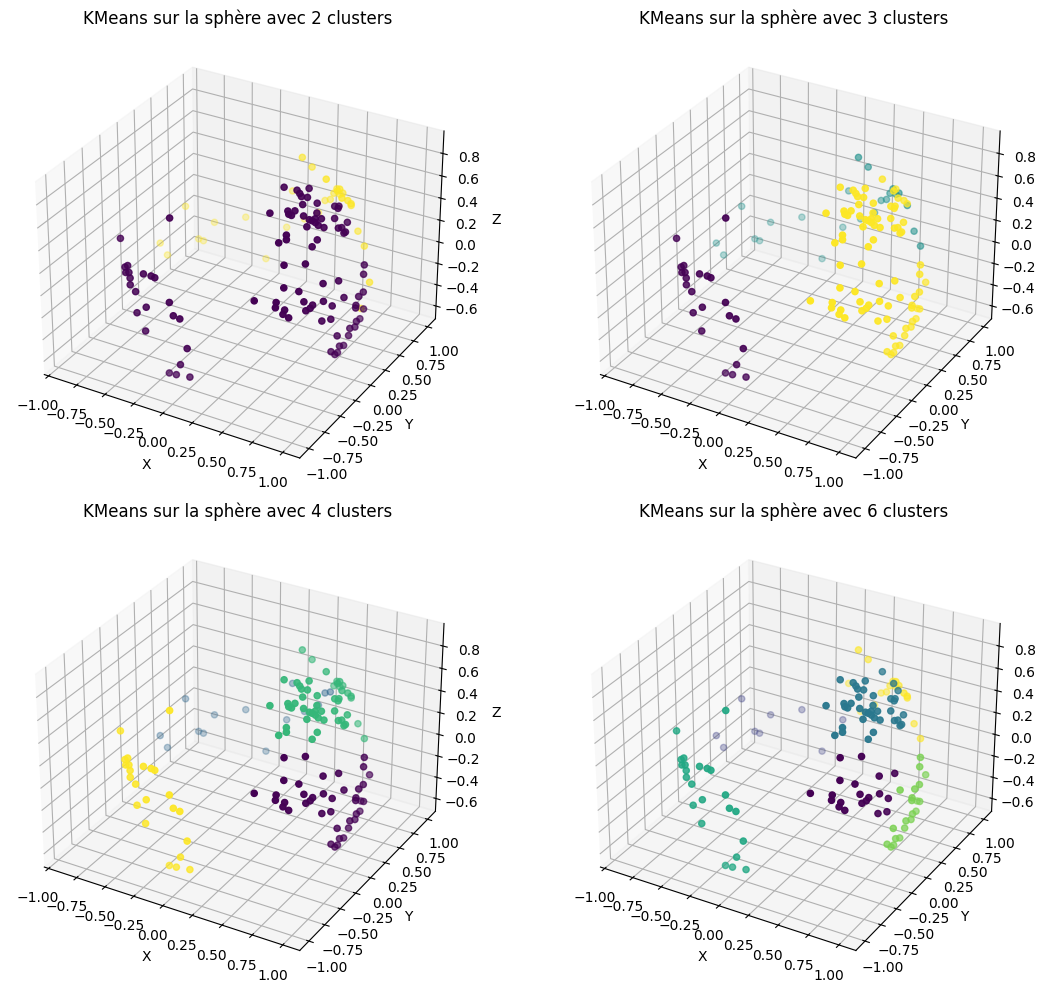

In [25]:
from itertools import product
from mpl_toolkits.mplot3d import Axes3D 

longitude = np.radians(np1[:, 0])
latitude = np.radians(np1[:, 1])

# Conversion en coordonnées cartésiennes
x = np.cos(latitude) * np.cos(longitude)
y = np.cos(latitude) * np.sin(longitude)
z = np.sin(latitude)


cartesian_coordinates = np.vstack((x, y, z)).T


n_clusters = [2, 3, 4, 6]
results = {}

for n in n_clusters:
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    kmeans.fit(cartesian_coordinates)
    results[n] = kmeans.labels_

# Visualiser les résultats en 3D
fig = plt.figure(figsize=(12, 10))
for i, n in enumerate(n_clusters):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.scatter(cartesian_coordinates[:, 0], cartesian_coordinates[:, 1], cartesian_coordinates[:, 2], 
               c=results[n], cmap='viridis', s=20)
    ax.set_title(f'KMeans sur la sphère avec {n} clusters')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()


## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

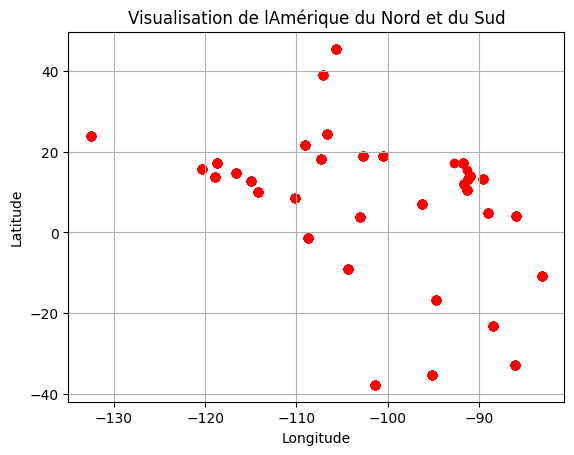

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df1 = pd.read_csv('data-20241007/Life_Expectancy_Data.csv')

# Ajuster les longitudes
df_X = df1[['Longitude', 'Latitude']].copy()  # Créer une copie pour ne pas modifier l'original
df_X['Longitude'] = df_X['Longitude'] - 30
df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x + 360 if x < -180 else x)

# Filtrer pour toutes les Amériques (Amérique du Nord et Amérique du Sud)
# Ajustez les limites pour inclure les latitudes de l'Amérique du Sud
americas = df_X[(df_X['Longitude'].between(-168.0, -70.0)) & (df_X['Latitude'].between(-60.0, 60.0))]

# Convertir en numpy pour le traçage
np1 = americas.to_numpy()

# Visualiser
plt.scatter(np1[:, 0], np1[:, 1], c='red')  # Utiliser une couleur unique pour l'Amérique
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualisation de lAmérique du Nord et du Sud')
plt.grid()
plt.show()


**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

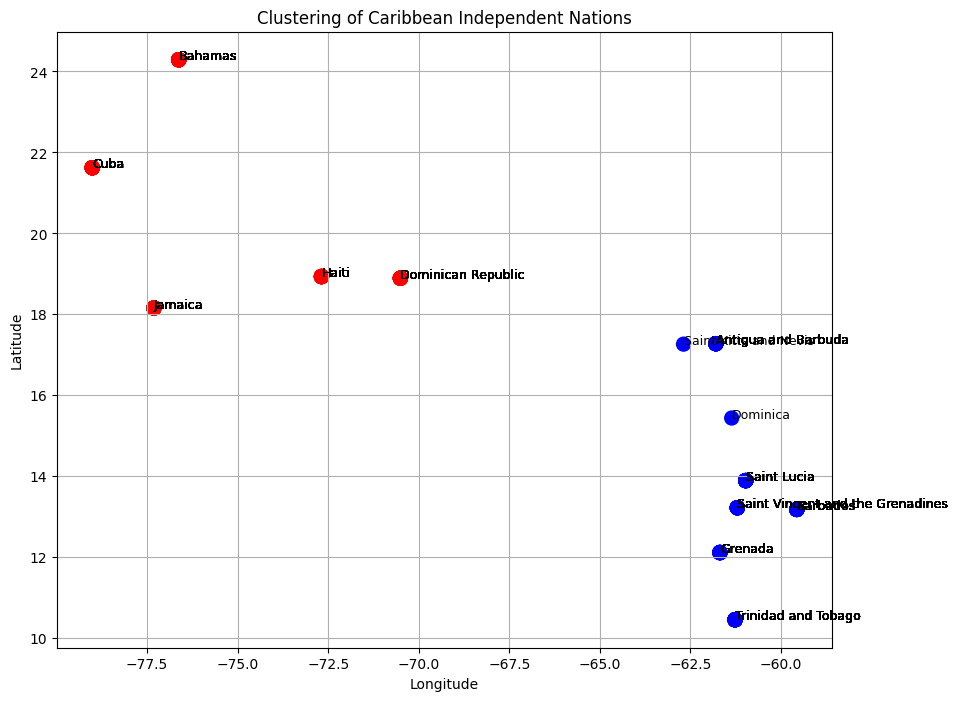

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors


caribbean_nations = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Cuba', 
                     'Dominica', 'Grenada', 'Haiti', 'Jamaica', 
                     'Saint Kitts and Nevis', 'Saint Lucia','Dominican Republic', 
                     'Saint Vincent and the Grenadines', 'Trinidad and Tobago']

caribbean_df = df1[df1['Country'].isin(caribbean_nations)]
df_X_caribbean = caribbean_df[['Longitude', 'Latitude']]


np1_caribbean = df_X_caribbean.to_numpy()


kmeans = KMeans(n_clusters=2, random_state=42)
caribbean_clusters = kmeans.fit_predict(np1_caribbean)


plt.figure(figsize=(10, 8))
plt.scatter(np1_caribbean[:, 0], np1_caribbean[:, 1], c=caribbean_clusters, 
            cmap=mcolors.ListedColormap(['red','blue']), s=100)

for i, nation in enumerate(caribbean_df['Country']):
    plt.annotate(nation, (np1_caribbean[i, 0], np1_caribbean[i, 1]), fontsize=9)

plt.title('Clustering of Caribbean Independent Nations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


**QUESTION 5**

Which is the outlier of this clustering problem?

les clusters présentés, on ne voit pas un potentiel outliers qui peut poser un problème.

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/1171452462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'] -30
/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/1171452462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x +360 if x < -180 else x)
/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/1171452462.py:7: FutureWarning: Downcasting behavior in `replace` is de

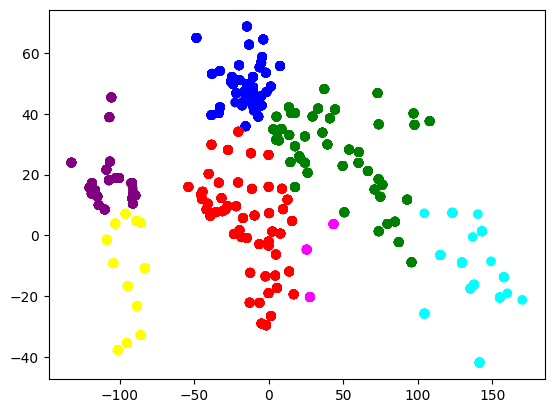

In [28]:
df_X = df1[['Longitude', 'Latitude']]
df_X['Longitude'] = df_X['Longitude'] -30
df_X['Longitude'] = df_X['Longitude'].apply(lambda x: x +360 if x < -180 else x)

df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()



In [29]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.559268186017894


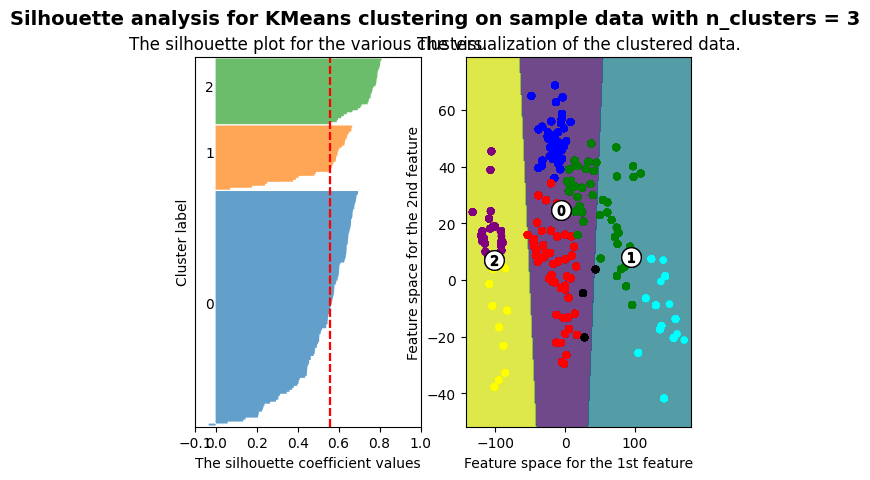

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

For n_clusters = 2 The average silhouette_score is : 0.47246317549377365
For n_clusters = 3 The average silhouette_score is : 0.559268186017894
For n_clusters = 4 The average silhouette_score is : 0.48945812463222294
For n_clusters = 6 The average silhouette_score is : 0.4585651687190697


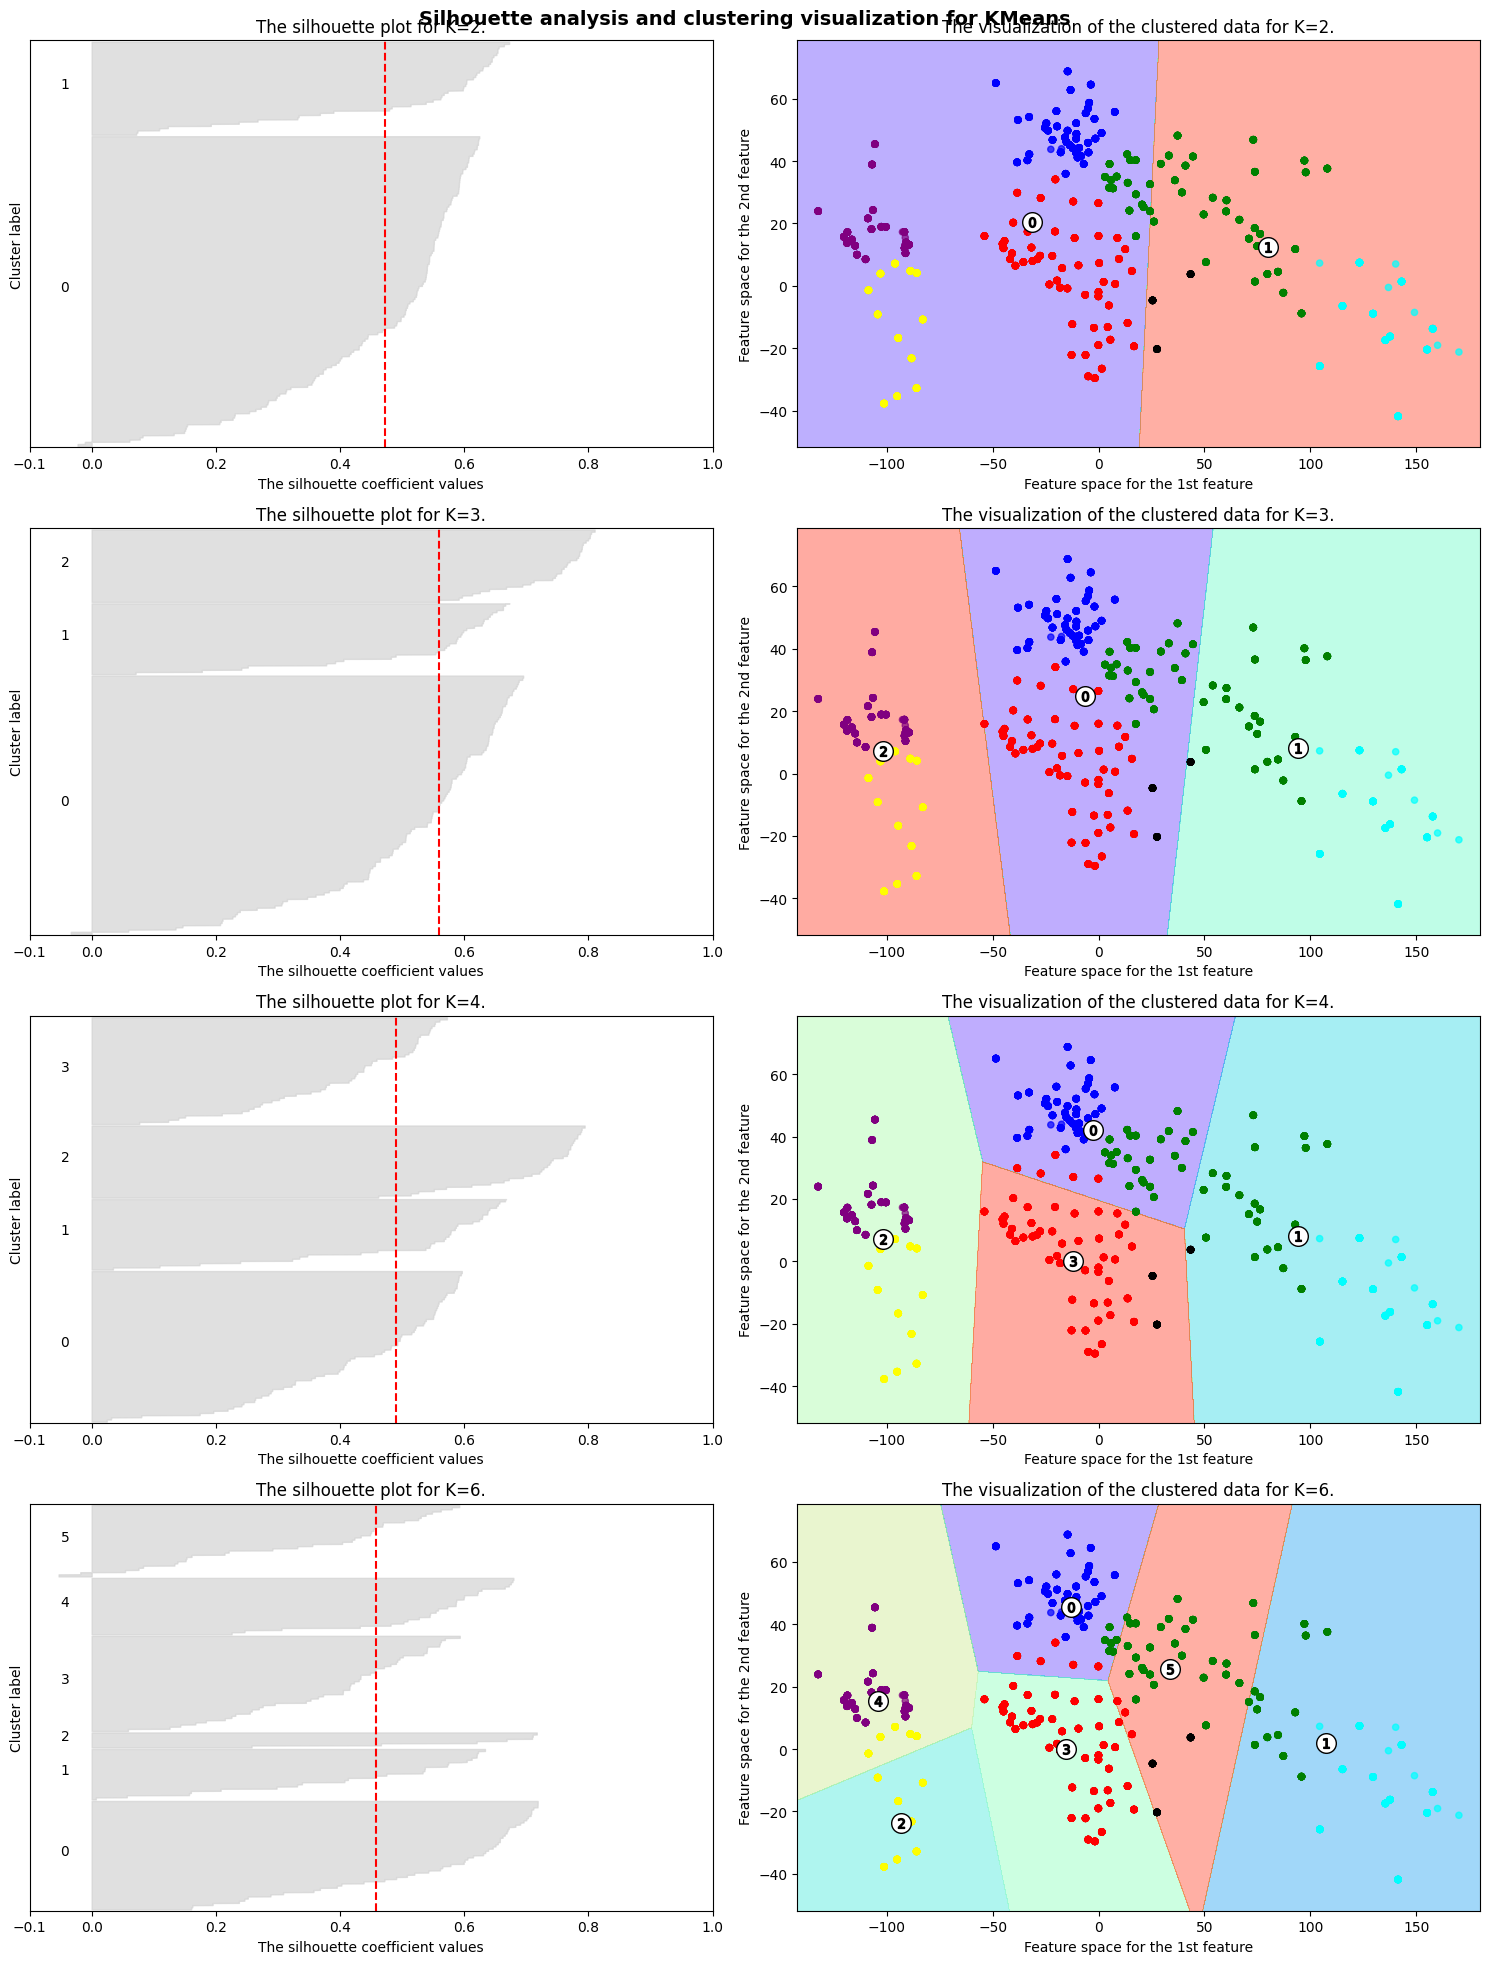

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score

# Valeurs de K pour l'analyse
K_values = [2, 3, 4, 6]

# Couleurs pour les continents
continent_colors = {
    0: 'red',     # Africa
    1: 'green',   # Asia
    2: 'blue',    # Europe
    3: 'purple',  # North America
    4: 'yellow',  # South America
    5: 'black',    # Seven seas
    6: 'cyan'  # Oceania
}


fig, axes = plt.subplots(len(K_values), 2, figsize=(15, 5 * len(K_values)))

for idx, K in enumerate(K_values):
    ax1 = axes[idx, 0]
    ax2 = axes[idx, 1]
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
            color='lightgrey'  # Couleur de fond
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"The silhouette plot for K={K}.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Afficher les clusters avec les couleurs de fond des continents
    ax2.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')  # Utiliser une carte de couleurs pour les clusters
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(list(continent_colors.values())), alpha=0.7)  # Couleurs fixes pour les continents

    centers = km.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title(f"The visualization of the clustered data for K={K}.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis and clustering visualization for KMeans",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()


**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

la valeur de K le plus importante est pour n_cluster = 3, mais pour autant on a pas une meilleure séparation des continents 'For n_clusters = 3 The average silhouette_score is : 0.556399348217091'

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

/var/folders/vv/klkd4n6s4879bw6t07pfn6wm0000gp/T/ipykernel_4653/4085572244.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


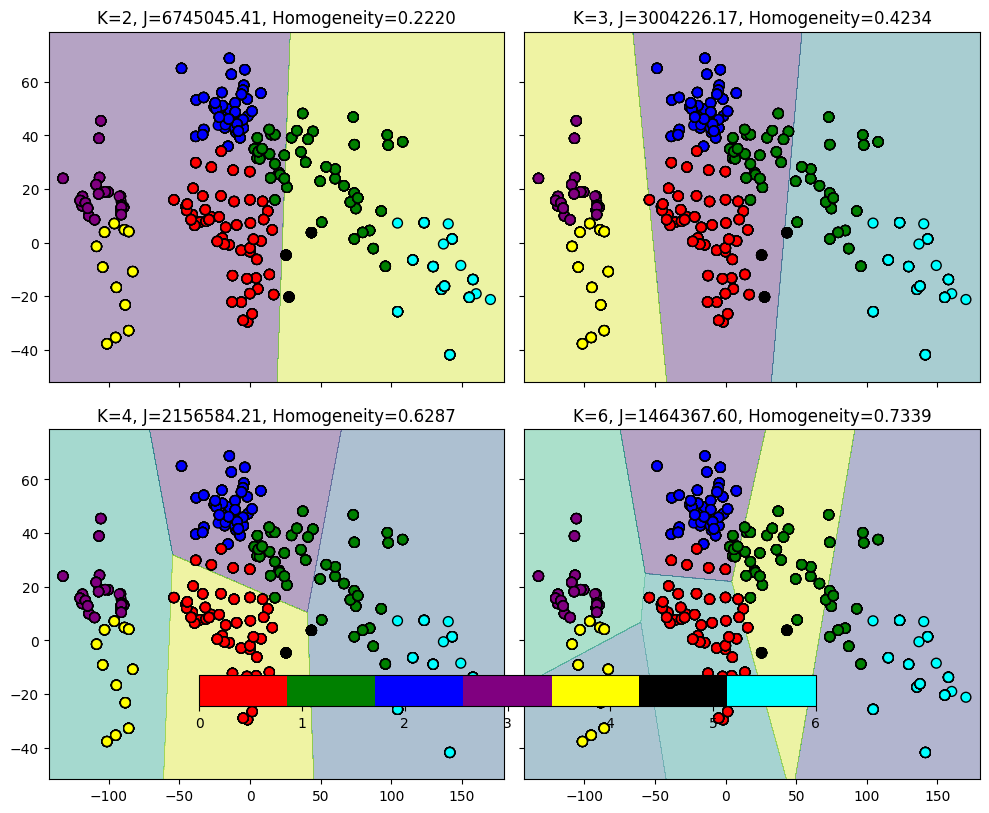

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import product
from sklearn import cluster
from sklearn.metrics import homogeneity_score

# Supposons que np1 et np_Y soient déjà définis
# np1 = longitude and latitude data
# np_Y = continent label data

# Fixer les couleurs pour les continents
continent_colors = ['red', 'green', 'blue', 'purple', 'yellow', 'black', 'cyan']

# Définir la grille de prédiction pour les clusters
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Appliquer KMeans pour différents nombres de clusters
km2 = cluster.KMeans(n_clusters=2, random_state=10).fit(np1)
km3 = cluster.KMeans(n_clusters=3, random_state=10).fit(np1)
km4 = cluster.KMeans(n_clusters=4, random_state=10).fit(np1)
km6 = cluster.KMeans(n_clusters=6, random_state=10).fit(np1)

# Calculer les scores d'homogénéité
homogeneity_k2 = homogeneity_score(np_Y, km2.labels_)
homogeneity_k3 = homogeneity_score(np_Y, km3.labels_)
homogeneity_k4 = homogeneity_score(np_Y, km4.labels_)
homogeneity_k6 = homogeneity_score(np_Y, km6.labels_)

# Créer les sous-graphes pour chaque KMeans
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

# Liste des scores d'inertie et d'homogénéité
for idx, km, inertia_homogeneity in zip(product([0, 1], [0, 1]),
                       [km2, km3, km4, km6],
                       [(km2.inertia_, homogeneity_k2), 
                        (km3.inertia_, homogeneity_k3), 
                        (km4.inertia_, homogeneity_k4), 
                        (km6.inertia_, homogeneity_k6)]):

    # Prédiction des clusters sur la grille
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer les contours des clusters en utilisant 'contourf'
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

    # Superposer les points des continents avec des couleurs fixes
    scatter = axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                            s=50, cmap=mcolors.ListedColormap(continent_colors), edgecolor='k')
    
    # Afficher le titre avec l'inertie et l'homogénéité
    inertia, homogeneity = inertia_homogeneity
    axarr[idx[0], idx[1]].set_title(f"K={km.n_clusters}, J={inertia:.2f}, Homogeneity={homogeneity:.4f}")

# Ajouter la légende des continents
plt.colorbar(scatter, ax=axarr, orientation='horizontal', fraction=0.05, pad=0.05)
plt.tight_layout()
plt.show()


**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

la valeur la plus intéressante de K pour homogeneity score est 0.8028 où les données sont bien clusterées

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?